# Creating and Backtesting Strategies

This will be a simple SMA (simple moving average) strategy 

### Moving Average Crossover Strategy

The strategy of acting on the crossover of short-period and long-period moving averages is a cornerstone of technical analysis, offering signals for potential entry and exit points based on trend momentum. Here's a detailed look at why this strategy is employed:

#### Trend Identification

- **Bullish Signal**: A short-period moving average crossing above a long-period moving average indicates a bullish signal. This suggests an upward trend, implying that buying could be profitable as the trend may continue.

- **Bearish Signal**: Conversely, a short-period moving average crossing below a long-period moving average signals a bearish outlook. This indicates a downward trend, suggesting that selling or shorting could be profitable as the trend may persist.

#### Momentum Confirmation

- Moving averages help smooth out price data over time, reducing noise from short-term fluctuations and highlighting changes in momentum. A crossover indicates a potential shift in trend direction, confirmed by the quicker-reacting short-period moving average moving above or below the slower long-period moving average.

#### Psychological and Behavioral Aspects

- The widespread attention to moving average crossovers among traders can create a self-fulfilling prophecy. If a significant number of market participants act on these signals, their collective actions can indeed push the market in the anticipated direction.
- Utilizing crossovers as signals can help diminish emotional and psychological biases in trading decisions, offering a more objective basis for making trades.

#### Limitations and Considerations

Despite its popularity and simplicity, the moving average crossover strategy has its limitations:

- **Lagging Indicator**: As moving averages are based on past prices, they inherently lag, meaning the signal to act comes after the trend has started, potentially leading to missed opportunities or late entries.

- **False Signals**: In volatile or sideways markets, moving average crossovers may produce false signals, leading to unprofitable trades.

- **Optimization and Testing**: The effectiveness of the strategy can significantly depend on the chosen periods for the moving averages. Traders typically need to backtest various period combinations to find the optimal settings for their specific trading style and the prevailing market conditions.

#### Summary

While the moving average crossover strategy provides a simple and effective method for trend identification and momentum confirmation, its success is enhanced when used in conjunction with other analysis tools and market context considerations. It's a powerful strategy, but awareness of its limitations and proper backtesting is crucial for making informed trading decisions.


# 0 Libraties

In [3]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

# 1. Simple Moving Average (SMA) Strategy - the crossover strategy

In [4]:
apple = yf.download("AAPL")
apple = apple['Close'].to_frame()
apple

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2024-02-05,187.679993
2024-02-06,189.300003
2024-02-07,189.410004


In [5]:
# 50 days moving average SMA short period and 100 days moving average SMA long period
sma_s = 50
sma_l = 100
apple['sma_s'] = apple['Close'].rolling(window=sma_s).mean()
apple['sma_l'] = apple['Close'].rolling(window=sma_l).mean()

<Axes: title={'center': 'APPL - SMA50 | SMA100'}, xlabel='Date'>

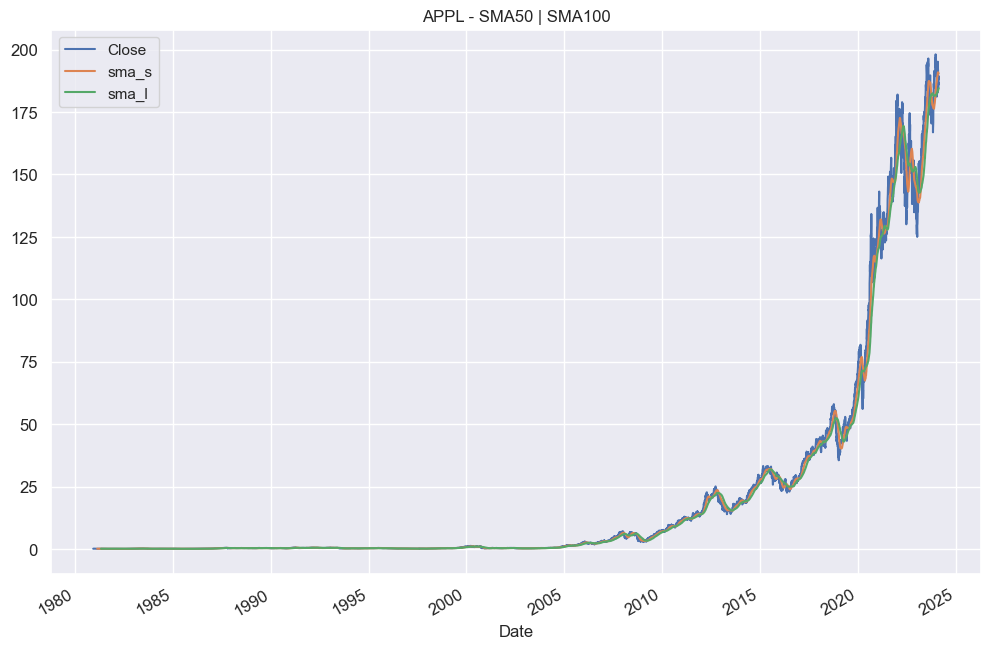

In [9]:
apple.plot(figsize=(12, 8), title = "APPL - SMA{} | SMA{}". format(sma_s, sma_l), fontsize = 12)

<Axes: title={'center': 'APPL - SMA50 | SMA100'}, xlabel='Date'>

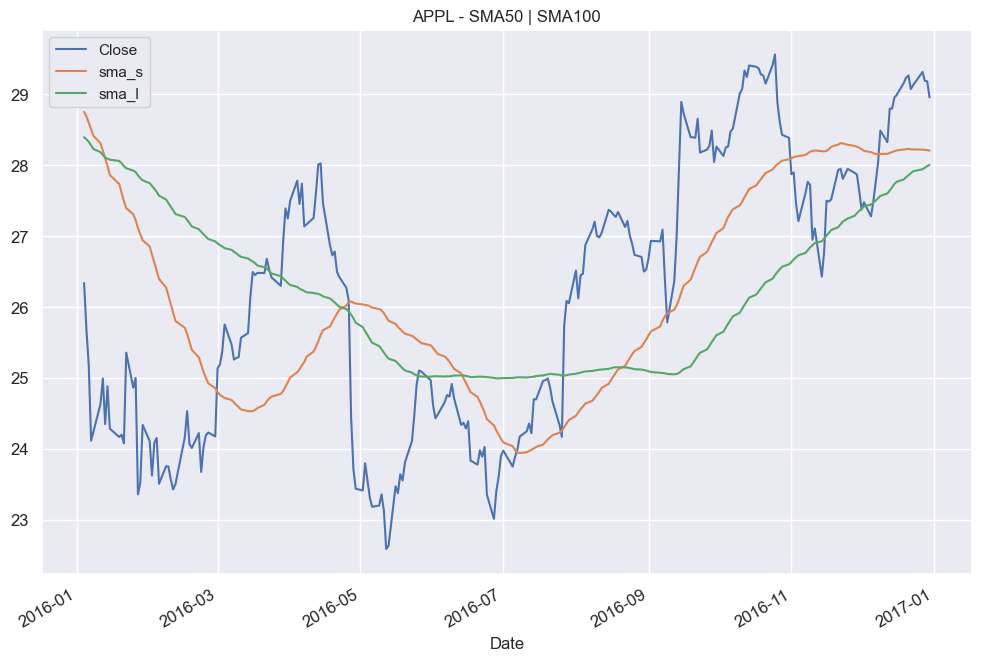

In [10]:
# for 2016 data:
apple.loc['2016'].plot(figsize=(12, 8), title = "APPL - SMA{} | SMA{}". format(sma_s, sma_l), fontsize = 12)

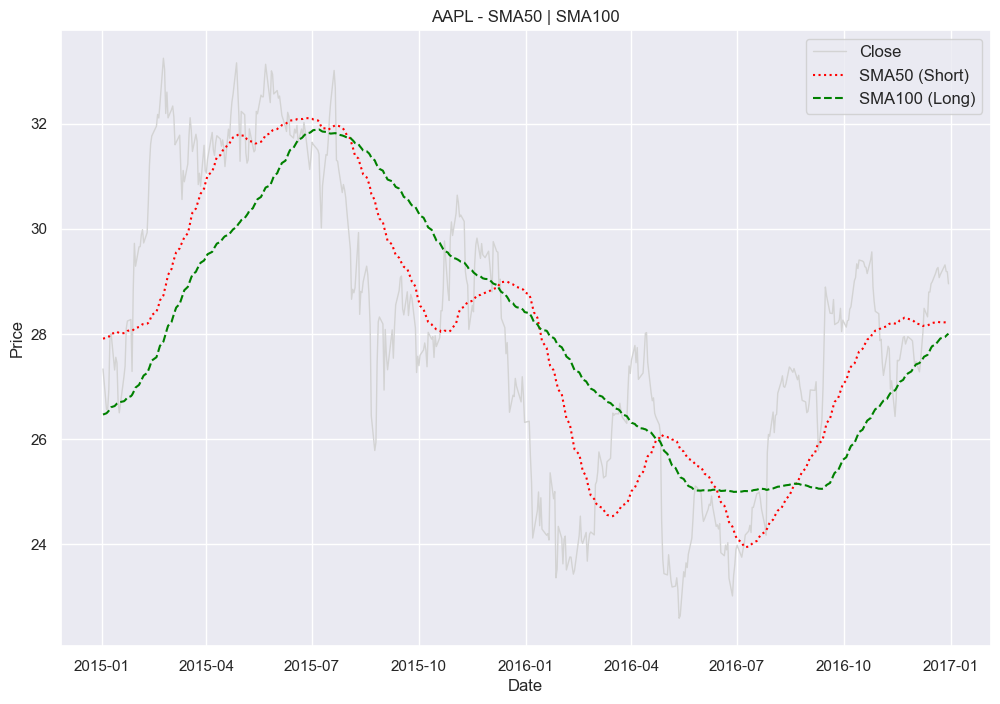

In [26]:

sma_s_column = 'sma_s'  
sma_l_column = 'sma_l'  

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(apple.loc['2015':'2016']['Close'], linestyle='-', color='lightgray', linewidth=1, label='Close')
plt.plot(apple.loc['2015':'2016'][sma_s_column], linestyle=':', color='red', label='SMA{} (Short)'.format(sma_s))
plt.plot(apple.loc['2015':'2016'][sma_l_column], linestyle='--', color='green', label='SMA{} (Long)'.format(sma_l))
plt.title("AAPL - SMA{} | SMA{}".format(sma_s, sma_l), fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=12)
plt.show()



In [11]:
# drop na values
apple.dropna(inplace=True)
apple

,Close,sma_s,sma_l
Date,,,
1981-05-06,0.122210,0.116752,0.124665
1981-05-07,0.123884,0.116975,0.124620
1981-05-08,0.125000,0.117187,0.124654
1981-05-11,0.122210,0.117266,0.124749
1981-05-12,0.122210,0.117333,0.124816
...,...,...,...
2024-02-05,187.679993,190.591199,184.015300
2024-02-06,189.300003,190.550999,184.166200
2024-02-07,189.410004,190.539799,184.302900


In [12]:
# when sma_s > sma_l, it is a buy signal, i.e when the short period moving average is greater than the long period moving average
# when sma_s < sma_l,  it is a sell signal, i.e when the short period moving average is less than the long period moving average
# we see this in the plot above for 2016 data

In [19]:
# we go long when sma_s > sma_l and go short when sma_s < sma_l

apple['position'] = np.where( apple['sma_s'] > apple['sma_l'], 1, -1)
apple

,Close,sma_s,sma_l,position
Date,,,,
1981-05-06,0.122210,0.116752,0.124665,-1
1981-05-07,0.123884,0.116975,0.124620,-1
1981-05-08,0.125000,0.117187,0.124654,-1
1981-05-11,0.122210,0.117266,0.124749,-1
1981-05-12,0.122210,0.117333,0.124816,-1
...,...,...,...,...
2024-02-05,187.679993,190.591199,184.015300,1
2024-02-06,189.300003,190.550999,184.166200,1
2024-02-07,189.410004,190.539799,184.302900,1


<Axes: title={'center': 'APPL - SMA50 | SMA100'}, xlabel='Date'>

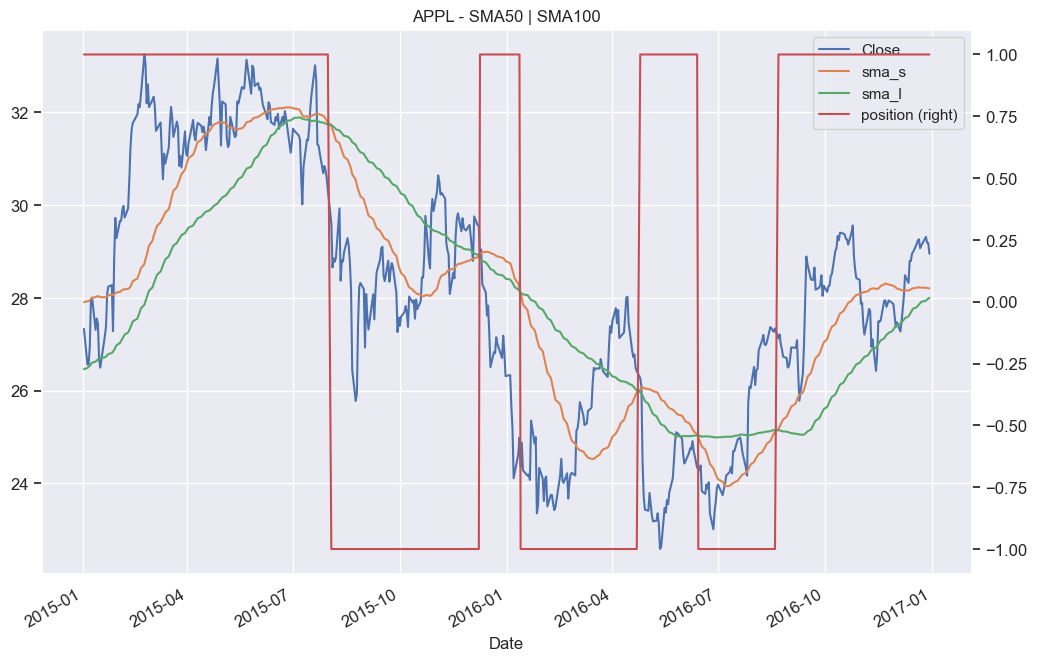

In [29]:
# plotting this
apple.loc["2015":"2016", ["Close", "sma_s", "sma_l", "position"]].plot(figsize=(12, 8), title = "APPL - SMA{} | SMA{}". format(sma_s, sma_l), fontsize = 12, secondary_y = 'position')

# its +1 when sma_s > sma_l i.e. we buy
# its -1 when sma_s < sma_l i.e. we sell

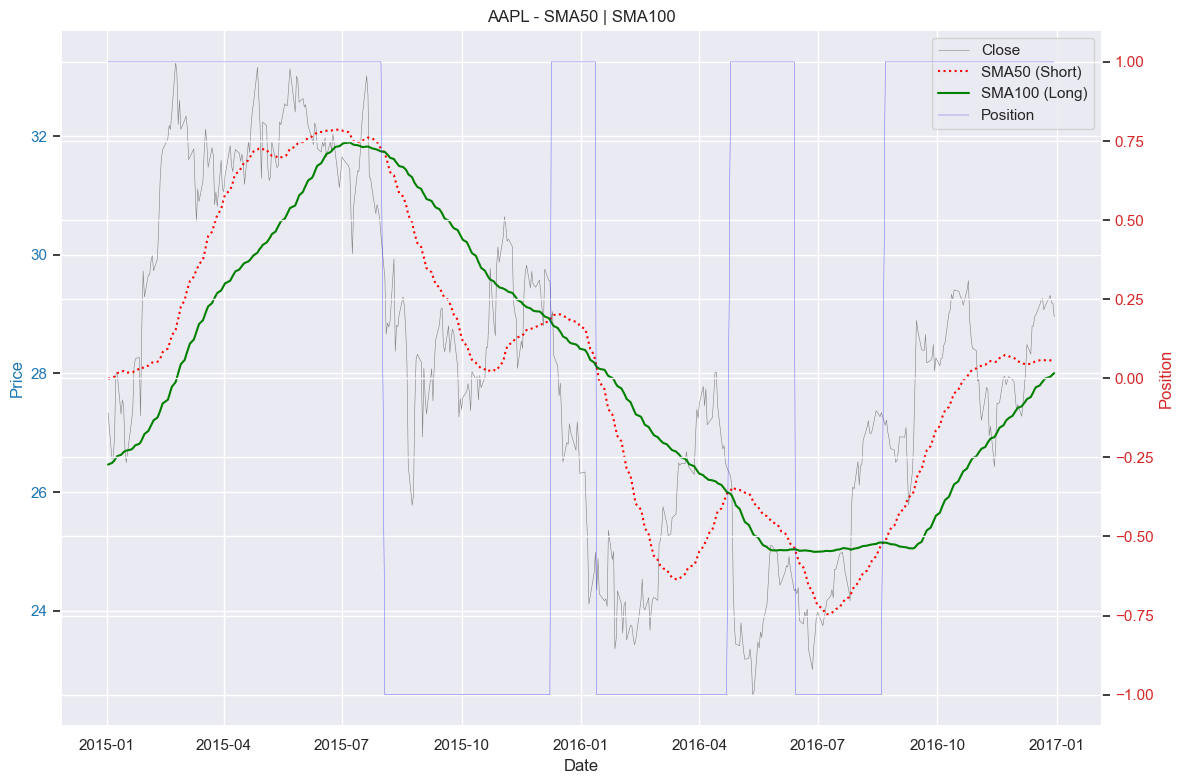

In [37]:
import matplotlib.pyplot as plt

# Assuming 'sma_s' and 'sma_l' are your actual column names for the short and long SMAs
# and 'position' is another column in your DataFrame.
sma_s_column = 'sma_s'  # Replace 'sma_s' with your actual short SMA column name
sma_l_column = 'sma_l'  # Replace 'sma_l' with your actual long SMA column name

# Create the plot with a specific size
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Close, sma_s, and sma_l on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(apple.loc["2015":"2016", 'Close'], color='gray', linewidth=0.4, label='Close')
ax1.plot(apple.loc["2015":"2016", sma_s_column], linestyle=':', color='red', label='SMA{} (Short)'.format(sma_s))
ax1.plot(apple.loc["2015":"2016", sma_l_column], linestyle='-', color='green', label='SMA{} (Long)'.format(sma_l))
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the position data
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Position', color=color)  # we already handled the x-label with ax1
ax2.plot(apple.loc["2015":"2016", 'position'], color='blue', linestyle='-', label='Position', linewidth=0.2)
ax2.tick_params(axis='y', labelcolor=color)

# Title and legend
plt.title("AAPL - SMA{} | SMA{}".format(sma_s, sma_l))
fig.tight_layout()  # to make sure everything fits without overlapping
# Create a combined legend for all plots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

plt.show()


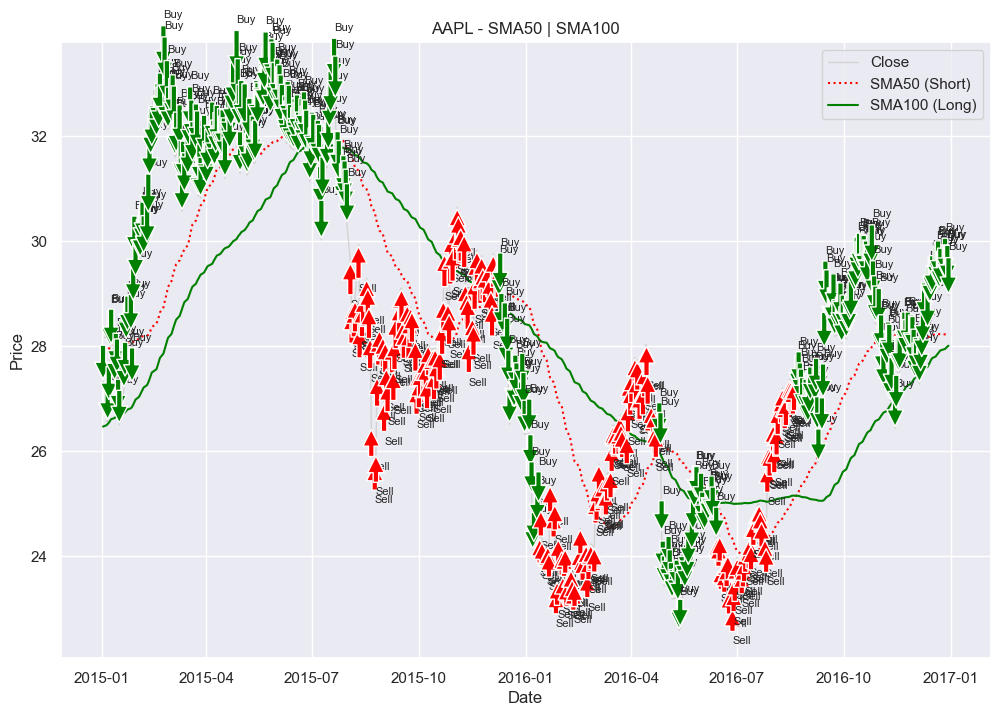

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'sma_s' and 'sma_l' are your actual column names for the short and long SMAs
sma_s_column = 'sma_s'  # Replace 'sma_s' with your actual short SMA column name
sma_l_column = 'sma_l'  # Replace 'sma_l' with your actual long SMA column name

# Create the plot with a specific size
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Close, sma_s, and sma_l on the primary y-axis
ax1.plot(apple.loc["2015":"2016", 'Close'], color='lightgray', linewidth=1, label='Close')
ax1.plot(apple.loc["2015":"2016", sma_s_column], linestyle=':', color='red', label='SMA{} (Short)'.format(sma_s))
ax1.plot(apple.loc["2015":"2016", sma_l_column], linestyle='-', color='green', label='SMA{} (Long)'.format(sma_l))
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.tick_params(axis='y')

# Annotate buy and sell positions directly on the plot
for date, position in apple.loc["2015":"2016", 'position'].items():
    if position == 1:  # Buy signal
        ax1.annotate('Buy', xy=(date, apple.loc[date, 'Close']), xytext=(date, apple.loc[date, 'Close'] * 1.03),
                     arrowprops=dict(facecolor='green', shrink=0.05), fontsize=8)
    elif position == -1:  # Sell signal
        ax1.annotate('Sell', xy=(date, apple.loc[date, 'Close']), xytext=(date, apple.loc[date, 'Close'] * 0.97),
                     arrowprops=dict(facecolor='red', shrink=0.05), fontsize=8)

# Title and legend
plt.title("AAPL - SMA{} | SMA{}".format(sma_s, sma_l))
ax1.legend(loc='best')

plt.show()


In [ ]:
# we see that this strategy is not very good, we can use other strategies like the RSI, MACD, etc
# we can also use the Bollinger Bands
# The reason why the strategy is not very good is because the moving average is a lagging indicator, it is based on past data
# additionally the moving average is not very good for trending markets, it is better for ranging markets
# moreover the moving average is not very good for volatile markets, it is better for stable markets
# we can use the Exponential Moving Average EMA to solve some of these problems
# the EMA gives more weight to the most recent data, it is more responsive to recent price changes
# we know that when the market is down we should buy and when the market is up we should sell but the moving average does not give us this information, it tells us to sell when the market is low and buy when the market is high which makes no sense
    

In [39]:
# now we need to back test this strategy, we need to see how well it would have performed in the past


In [40]:
apple['returns_buy_hold'] = np.log(apple['Close'].div(apple['Close'].shift(1))) # buy and hold just means we're going long and holding the stock
apple

,Close,sma_s,sma_l,position,returns_buy_hold
Date,,,,,
1981-05-06,0.122210,0.116752,0.124665,-1,NaN
1981-05-07,0.123884,0.116975,0.124620,-1,0.013605
1981-05-08,0.125000,0.117187,0.124654,-1,0.008968
1981-05-11,0.122210,0.117266,0.124749,-1,-0.022573
1981-05-12,0.122210,0.117333,0.124816,-1,0.000000
...,...,...,...,...,...
2024-02-05,187.679993,190.591199,184.015300,1,0.009798
2024-02-06,189.300003,190.550999,184.166200,1,0.008595
2024-02-07,189.410004,190.539799,184.302900,1,0.000581


In [41]:
apple['strategy'] = apple['returns_buy_hold'] * apple['position'].shift(1) # we shift the position by 1 because we want to use the previous day's position to calculate the strategy
apple
# we multiply the returns by the position because when we have a buy signal we want to multiply the returns by 1 and when we have a sell signal we want to multiply the returns by -1

,Close,sma_s,sma_l,position,returns_buy_hold,strategy
Date,,,,,,
1981-05-06,0.122210,0.116752,0.124665,-1,NaN,NaN
1981-05-07,0.123884,0.116975,0.124620,-1,0.013605,-0.013605
1981-05-08,0.125000,0.117187,0.124654,-1,0.008968,-0.008968
1981-05-11,0.122210,0.117266,0.124749,-1,-0.022573,0.022573
1981-05-12,0.122210,0.117333,0.124816,-1,0.000000,-0.000000
...,...,...,...,...,...,...
2024-02-05,187.679993,190.591199,184.015300,1,0.009798,0.009798
2024-02-06,189.300003,190.550999,184.166200,1,0.008595,0.008595
2024-02-07,189.410004,190.539799,184.302900,1,0.000581,0.000581


In [42]:
apple.dropna(inplace=True)
apple

,Close,sma_s,sma_l,position,returns_buy_hold,strategy
Date,,,,,,
1981-05-07,0.123884,0.116975,0.124620,-1,0.013605,-0.013605
1981-05-08,0.125000,0.117187,0.124654,-1,0.008968,-0.008968
1981-05-11,0.122210,0.117266,0.124749,-1,-0.022573,0.022573
1981-05-12,0.122210,0.117333,0.124816,-1,0.000000,-0.000000
1981-05-13,0.121652,0.117422,0.124844,-1,-0.004576,0.004576
...,...,...,...,...,...,...
2024-02-05,187.679993,190.591199,184.015300,1,0.009798,0.009798
2024-02-06,189.300003,190.550999,184.166200,1,0.008595,0.008595
2024-02-07,189.410004,190.539799,184.302900,1,0.000581,0.000581


In [43]:
apple[["returns_buy_hold", "strategy"]].sum()
# we see that the returns are higher for buy and hold, this means that the strategy is not very good

returns_buy_hold    7.342967
strategy            0.890696
dtype: float64

In [44]:
# now calculate the absolute performance of the strategy
# this is for 1 dollar investment:

apple[["returns_buy_hold", "strategy"]].sum().apply(np.exp)


returns_buy_hold    1545.290899
strategy               2.436826
dtype: float64

In [47]:
apple[["returns_buy_hold", "strategy"]].std()*np.sqrt(252)

# the buy and hold and the strategy have a similar standard deviation, this means that the strategy is not very good

returns_buy_hold    0.449933
strategy            0.450061
dtype: float64

# 2. Strategy Adjusted With Long Bias

<Axes: xlabel='Date'>

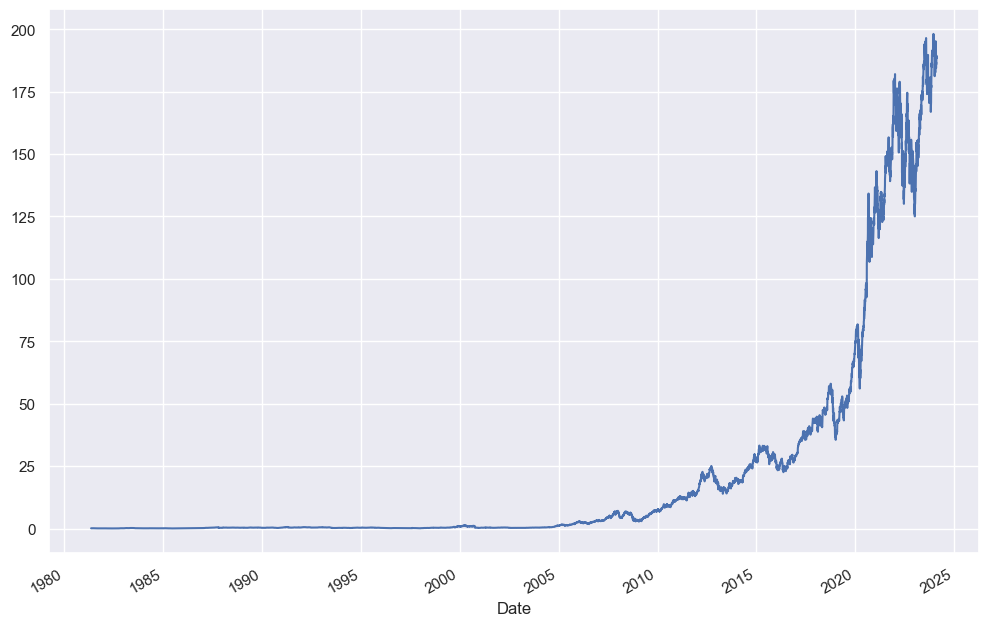

In [49]:
apple['Close'].plot(figsize=(12, 8))
# this graph shows that a general bias upwards. Thus how about we make a strategy in such a way that we don't go short

In [50]:
apple['position_2'] = np.where( apple['sma_s'] > apple['sma_l'], 1, 0)
apple

,Close,sma_s,sma_l,position,returns_buy_hold,strategy,position_2
Date,,,,,,,
1981-05-07,0.123884,0.116975,0.124620,-1,0.013605,-0.013605,0
1981-05-08,0.125000,0.117187,0.124654,-1,0.008968,-0.008968,0
1981-05-11,0.122210,0.117266,0.124749,-1,-0.022573,0.022573,0
1981-05-12,0.122210,0.117333,0.124816,-1,0.000000,-0.000000,0
1981-05-13,0.121652,0.117422,0.124844,-1,-0.004576,0.004576,0
...,...,...,...,...,...,...,...
2024-02-05,187.679993,190.591199,184.015300,1,0.009798,0.009798,1
2024-02-06,189.300003,190.550999,184.166200,1,0.008595,0.008595,1
2024-02-07,189.410004,190.539799,184.302900,1,0.000581,0.000581,1


In [52]:
apple['strategy_2'] = apple['returns_buy_hold'] * apple['position_2'].shift(1)
apple.dropna(inplace=True)
apple

,Close,sma_s,sma_l,position,returns_buy_hold,strategy,position_2,strategy_2
Date,,,,,,,,
1981-05-08,0.125000,0.117187,0.124654,-1,0.008968,-0.008968,0,0.000000
1981-05-11,0.122210,0.117266,0.124749,-1,-0.022573,0.022573,0,-0.000000
1981-05-12,0.122210,0.117333,0.124816,-1,0.000000,-0.000000,0,0.000000
1981-05-13,0.121652,0.117422,0.124844,-1,-0.004576,0.004576,0,-0.000000
1981-05-14,0.119978,0.117500,0.124782,-1,-0.013856,0.013856,0,-0.000000
...,...,...,...,...,...,...,...,...
2024-02-05,187.679993,190.591199,184.015300,1,0.009798,0.009798,1,0.009798
2024-02-06,189.300003,190.550999,184.166200,1,0.008595,0.008595,1,0.008595
2024-02-07,189.410004,190.539799,184.302900,1,0.000581,0.000581,1,0.000581


In [54]:
print(apple[["returns_buy_hold", "strategy_2"]].sum())
print("\n")
# now calculate the absolute performance of the strategy
# this is for 1 dollar investment:

print(apple[["returns_buy_hold", "strategy_2"]].sum().apply(np.exp))

print("\n")

apple[["returns_buy_hold", "strategy_2"]].std()*np.sqrt(252)


returns_buy_hold    7.329363
strategy_2          4.116832
dtype: float64


returns_buy_hold    1524.409983
strategy_2            61.364524
dtype: float64




returns_buy_hold    0.449950
strategy_2          0.344237
dtype: float64

In [ ]:
# strategy 2 is better than strategy 1, but it is still not very good

In [56]:
print(apple[["strategy", "strategy_2"]].sum())
print("\n")
# now calculate the absolute performance of the strategy
# this is for 1 dollar investment:

print(apple[["strategy", "strategy_2"]].sum().apply(np.exp))

print("\n")

apple[["strategy", "strategy_2"]].std()*np.sqrt(252)

strategy      0.904301
strategy_2    4.116832
dtype: float64


strategy       2.470205
strategy_2    61.364524
dtype: float64




strategy      0.450077
strategy_2    0.344237
dtype: float64

In [ ]:
# this indicates that strategy 2 is better than strategy 1